In [2]:
!pip install wordcloud



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
# Original data
fields=['target','ids','date','query','user','text']
df = pd.read_csv("tweetsentimentdata.csv", encoding="ISO-8859-1", names=fields)
df.info()

df = df[['target', 'text']]
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   query   1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [30]:
df.tail(10)

,target,text
1599990,4,WOOOOO! Xbox is back
1599991,4,@rmedina @LaTati Mmmm That sounds absolutely perfect... but my schedule is full. I won't have time to lay in bed until Sunday. Ugh!!
1599992,4,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,4,@SCOOBY_GRITBOYS
1599994,4,"@Cliff_Forster Yeah, that does work better than just waiting for it In the end I just wonder if I have time to keep up a good blog."
1599995,4,Just woke up. Having no school is the best feeling ever
1599996,4,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599997,4,Are you ready for your MoJo Makeover? Ask me for details
1599998,4,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur
1599999,4,happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H


In [31]:
# Getting preprocessed dataset
df = pd.read_csv("preprocessed_tweetsentimentdata.csv", encoding="ISO-8859-1", header=0)

pd.options.display.max_colwidth = 280
# What does the data looks like?
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593793 entries, 0 to 1593792
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1593793 non-null  int64 
 1   text    1593793 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.3+ MB


,target,text
0,0,awww s bummer shoulda got david carr third day do
1,0,upset ca nt update facebook texting might cry result school today also blah
2,0,dived many time ball managed save rest go bound
3,0,whole body feel itchy like fire
4,0,no s not behaving m mad ca nt see over
5,0,not whole crew
6,0,need hug
7,0,hey long time no see yes rain bit bit lol m fine thanks s
8,0,nope did nt have
9,0,que muera


In [32]:
df.tail(10)

,target,text
1593783,4,im glad ur well
1593784,4,wooooo xbox back
1593785,4,mmmm sound absolutely perfect but schedule full wo nt have time lay in bed sunday ugh
1593786,4,recovering long weekend
1593787,4,yeah doe work better waiting in end wonder have time keep good blog
1593788,4,woke having no school best feeling ever
1593789,4,thewdbcom cool hear old walt interview Ã¢
1593790,4,ready mojo makeover ask detail
1593791,4,happy th birthday boo alll time tupac amaru shakur
1593792,4,happy


Negative    797045
Positive    796748
Name: target, dtype: int64


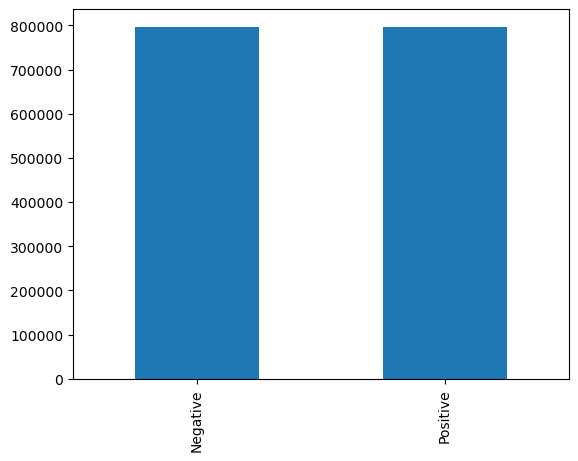

In [33]:
# Visualize the data sentiment distribution
sentiments = {0: "Negative", 4: "Positive"}
print(df.target.apply(lambda x: sentiments[x]).value_counts())
df.target.apply(lambda x: sentiments[x]).value_counts().plot(kind = 'bar')
plt.show()

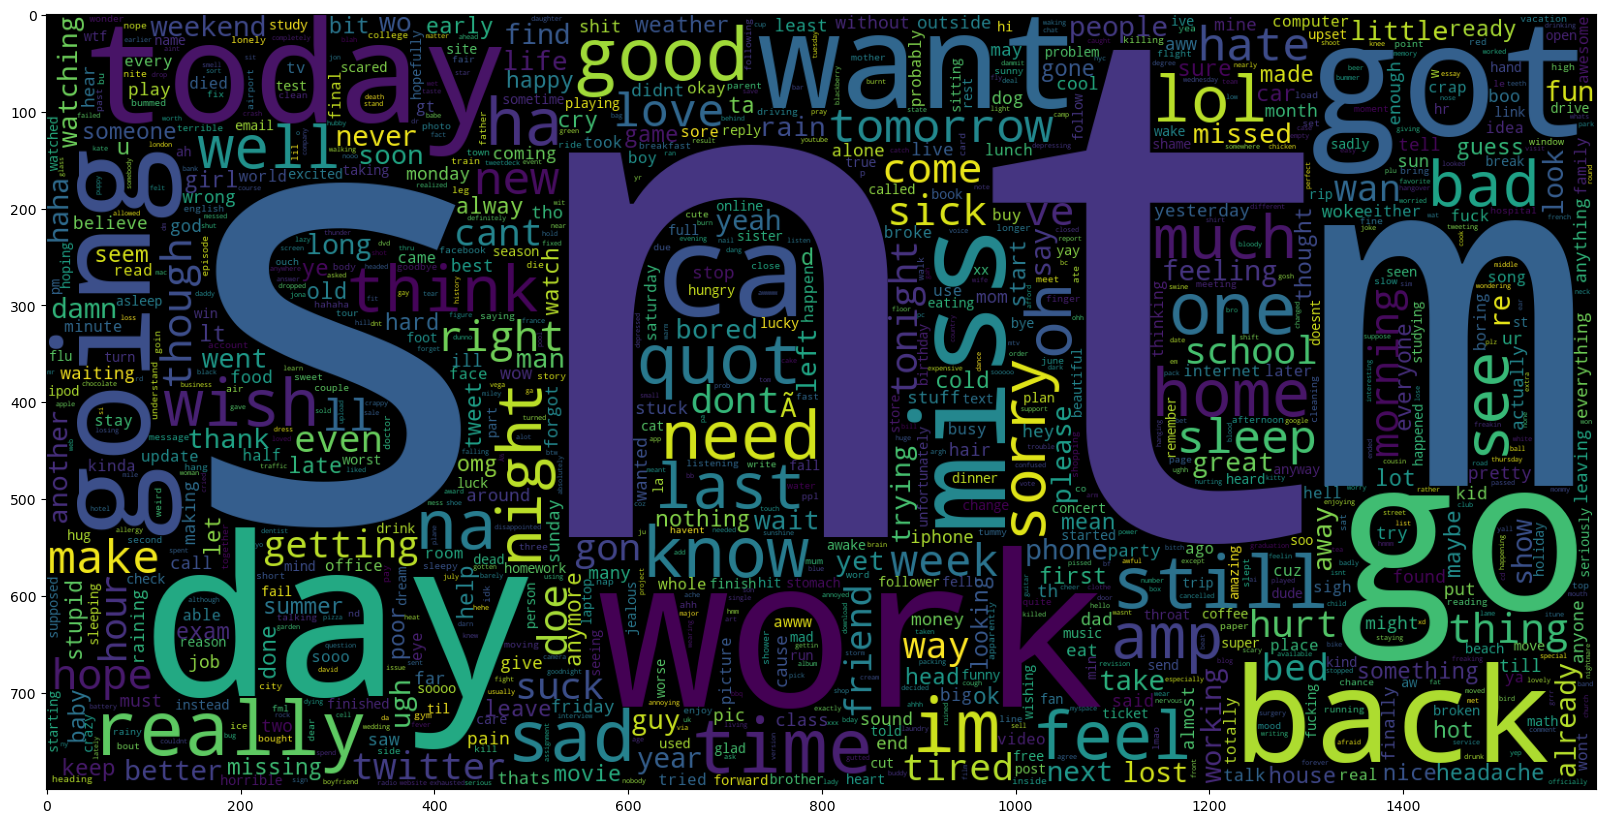

In [34]:
data_neg = df['text'][:797045]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

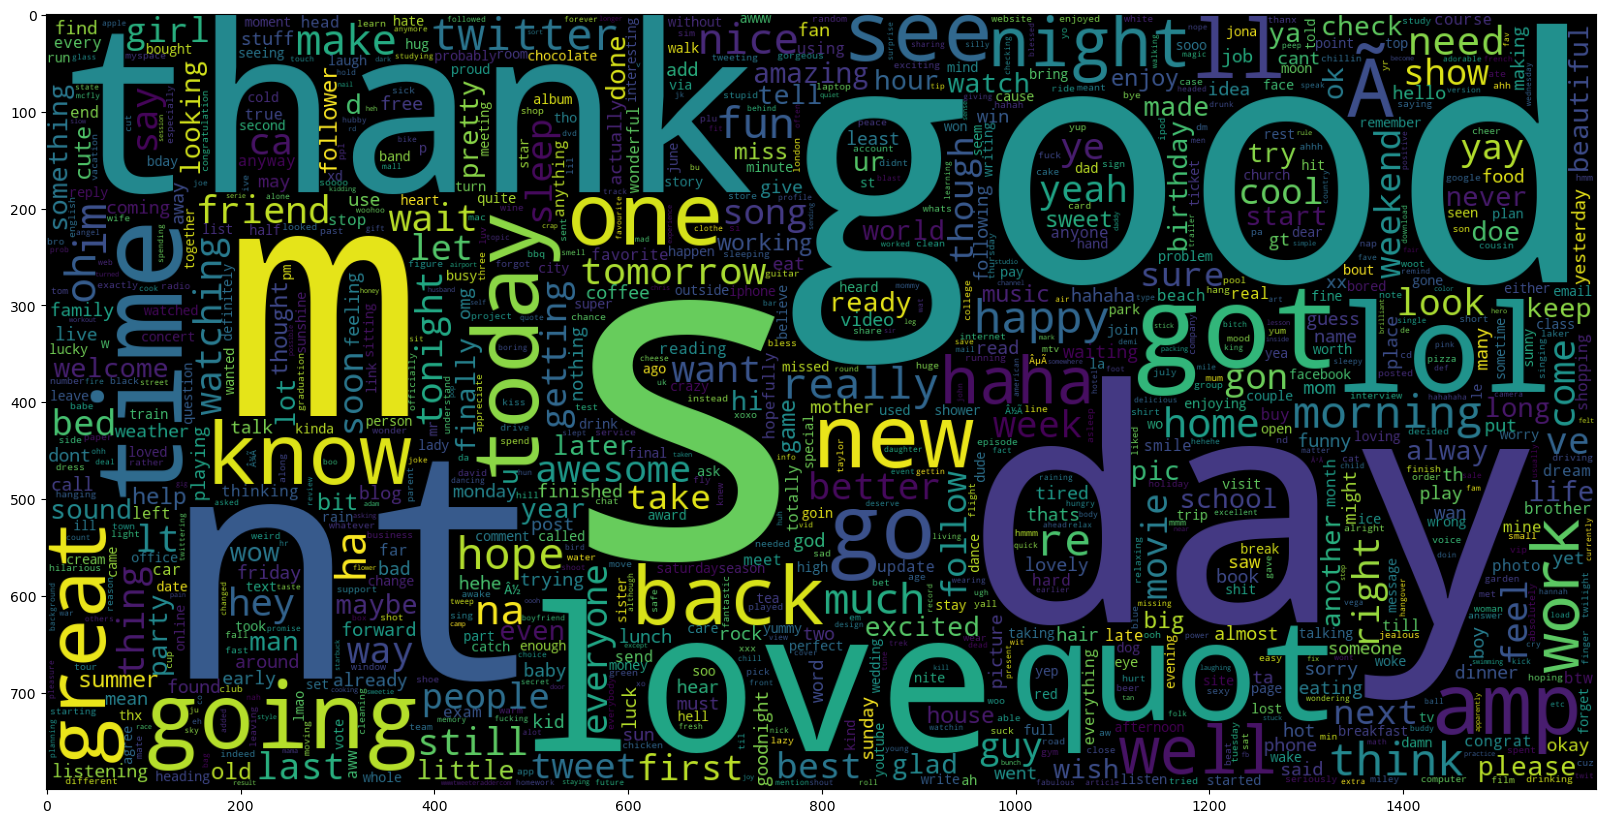

In [35]:
data_pos = df['text'][797045:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)